# Introduction To The MSEIR Model


## Math 302 -D102
#### Bryce Haley, bhaley, 301 135 842
#### 04 Decemeber 2017

#### Abstract

This notebook explains and explores the MSEIR model using the dynamics of chicken pox as an example. The MSEIR model, a compartmental model, is introduced with a diagram and introduction to systems of ODE's. These equations are shown to play out under two conditions in a pair of plots, equilibrium conditions are explored, the effects of varying initial conditions are shown on phase planes, and finally a brief section showing an adapted MSEIR model including vaccinations is explored. 

# 1 The Model

##  1.1 Variables

variable| definition|   |variable| definition
-|-|-|-|-   
$N$: |population||$\beta$: |contact rate
$M$:| Passively Immune|  |$\delta$: |transfer out rate for passive immunity
$S$:|Susceptible||$\epsilon$: |transfer out rate for exposed
$E$:|Exposed  |    |$\gamma$:| recovery rate
$I$:|Infectious| | $b$:|birthrate
$R$:|Removed| | $d$:|deathrate
$R_0$:|basic reproduction number| |$q$:|net change rate($b-d$)


All class variables in the lower case refer to population ratios, whereas capital case variables refer to the total number of persons in the compartment. Meaning $m= \frac{M}{N}$and s= $\frac{S}{N}$.

## 1.2 Diagram   
![title](img/essay_diagram.png)

With the MSEIR model individuals move from left to right in the above diagram across five compartments that contain the sum of the population modeled. Given a number of infected in an otherwise fully susceptible population, persons will move from susceptible to exposed representing where the disease has a latency period, inversely proportional to $\delta$, before the latent themselves become infectious. As people recover they are moved to the Removed/Recovered population compartment, where they will remain, with immunity from the disease intact, until death. The deathrate in this model impacts all classes equally. The dynamics around birthrate force the introduction to the final compartment, $M$, which contain people with short term maternal immunity. The birthrate into the susceptible class is proportional to the population in the susceptible class; the birth rate into the class of maternally immune is proportional to the size of the rest of the classes. No other class has persons born into it. 

## 1.3 Differential Equations
Using the above diagram to interpret the rates of change in the five compartments we can obtain the following differential equations [Hethcote, 619]:
\begin{align}
M' &= b(N-S) - dM - \delta M = b(N-S) - (d + \delta)M\\
S' &= bS + \delta M - \beta S \frac{I}{N} - dS\\
E' &= \beta S \frac{I}{N} - \epsilon E - d E = \beta S \frac{I}{N} - (\epsilon + d) E\\
I' &= \epsilon E - dI - \gamma I= \epsilon E - (d+\gamma)I\\
R' &= \gamma I - dR\\
N' &= (b-d)N = qN\\
\end{align}

Now we can divide all terms by $N$ to obtain the set of ODEs that look at the classes as ratios of the total population. Using the method from Hethcote, $s$ will be eliminated by setting $s = 1-m-e-i-r$, and the quotient rule will be applied as follows.

For any X' $\rightarrow$ x' [Chauve, personal email]:
\begin{align}
x' &= \frac{X'N - XN'}{N^2}\\
&= \frac{X'}{N}\frac{N}{N} - \frac{X}{N}\frac{N'}{N}\\
&= \frac{X'}{N} - qx\\
\end{align}so we have the following ODEs:\begin{align}\\
m' &= b(1-s) - (d + \delta)m - qm\\
&= b(m+e+i+r) -dm- \delta m - qm\\
&= m(b-d-q) + b(e+i+r) -\delta m\\
&= b(e+i+r) - \delta m\\
\\
s' &= bs+\delta m -\beta i s\\
&= \delta m - \beta s i\\
&= -m' -e' -i'-r'\\
\\
e'&=\beta si - (\epsilon + d) e - qe\\
&= \beta i (1-m-e-i-r) -(\epsilon +d +q) e\\
&= \beta i (1-m-e-i-r) -(\epsilon +b) e\\
\\
i'&=\epsilon e - (\gamma + d)i -ie \\
&= \epsilon e - (\gamma + d+q)i\\
&= \epsilon e - (\gamma + b)i\\
\\
r'&= \gamma i - dr -qr \\
&= \gamma i - (d+q)r \\
&= \gamma i - br \\
\end{align}




Below are two figures plotting all five compartments of the MSEIR model on one graph. Both model chickenpox, the first models a short outbreak that dies out in a relatively short period of time, and the second looks at a more contagious outbreak over a much longer time scale by adjusting the $\beta$ value. 

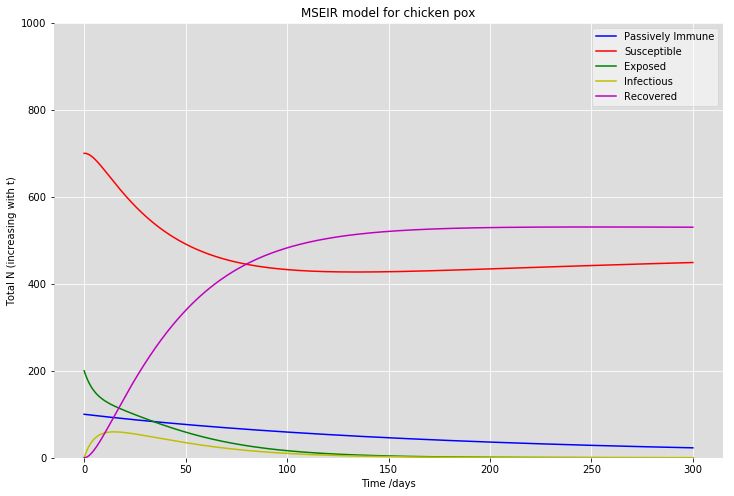

In [10]:
makePlot(1)

The figure above shows a Chicken Pox outbreak in a community of 1000. This community initially had 100 maternally immune individuals and 200 latent persons. The rest were susceptible. This could be a model for a school in where many children were infected recently on a school trip. We can see that the category of exposed sharply dipped before a significant enough portion of them moved into the infectious compartment and began themselves creating more latent persons. The infectious compartment grew initially, peaking at more than 50 infected, at around 10 days into the model. This model used all the data for chickenpox from Hethcote's paper [618] but had beta, $\beta$, at $\frac{1}{6}$, deathrate = $\frac{1}{22000}$, and birthrate = $\frac{1}{19000}$. This $\beta$ was too low to create an endemic disease. The birth and death rates failed to play a significant role in this shortly lived disease.

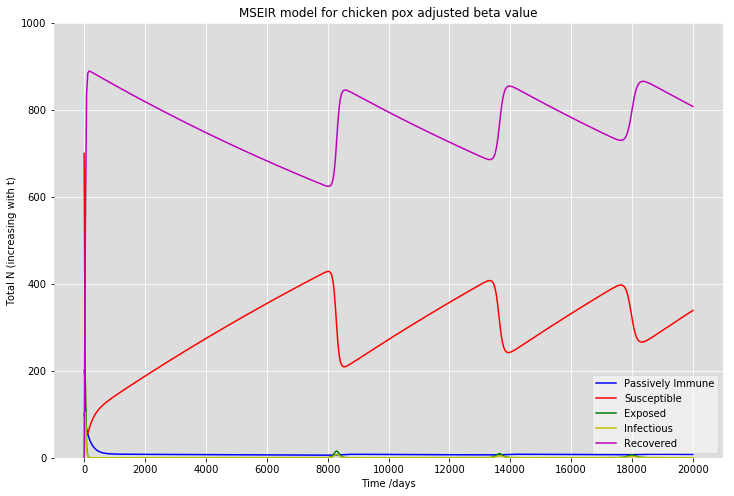

In [11]:
makePlot(2)

In this second model the parameters of the disease as well as birth and death rate were unchanged from the earlier figure. All that changed was the $\beta$, the contact rate, which is $\frac{1}{2}$ for the above figure. Now, this models chickenpox over a period of time greater than fifty years. This shows, within this closed population, the disease failing to die out and having period surges within the population whenever the number of susceptible people grows sufficiently. It is no longer appropriate to say this models a school, but it could model some sort of closed, isolated community. The birth and death rates certainly had a role in this longer outbreak. As it is the individuals being born and moving out of the maternally immune compartment that allow the populations percentage of susceptible to reach critical levels and the disease to spread again. 

# 2 Properties of MSEIR
## 2.1 Equilibrium

The basic reproduction number, $R_0$, as it is for simpler models such as the SIR model represents "the average number of secondary infections that occur when one infective is introduced into a completely susceptible host population"[Hethcote, 603]. In the MSEIR model this is equivalent to the contact number, $\sigma$, "the average number of adequate contacts of a typical infective during the infectious period" [Hethcote, 603]. This is because in the MSEIR model, there is precisely one class of infected persons. For an understanding of when this equivalence does not hold, consult *The Mathematics of Infectious Diseases* for a full discussion on the topic with numerous references. In this paper only $R_0$ will be discussed with the understanding the above equivalence. 

$R_0$ is simply the product of the contact rate, average infectious period account for population growth, and the fraction of exposed persons who survive to become infectious [Hethcote, 620]. 
So,

\begin{align}\\
R_0 &= \beta \times \frac{1}{\gamma + b} \times \frac{\epsilon}{\epsilon + b}\\
&= \frac{\beta \epsilon}{(\gamma + b)(\epsilon + b)}
\end{align}

Note: $s_e = \frac{1}{R_0}$.

For any endemic disease, a disease which stays in a population like the second plot for chicken pox, the equilibrium points that all the compartments will tend to can be found for by setting the derivative to zero and solving each system. If the disease was not endemic $i$ would tend to zero and $s$ to 1. 

\begin{align}
m'=0 &= b(e_e+i_e+r_e)-\delta m_e\\
&=b(1-m_e - s_e)-\delta m_e\\
&= -bm_e+b(1-s_e)-\delta m_e\\
bm_e + \delta m_e &= b(1-s_e)\\
m_e &= \frac{b(1-s_e)}{b+\delta}\\
m_e &= \frac{b}{b+\delta} \left( 1-\frac{1}{R_0} \right)  \\
\\s' = 0 &= \delta m_e - \beta s_e i_e\\
\beta s_e i_e &= \delta m_e\\
\beta i_e &= \delta m_e \frac{1}{s_e}\\
\beta i_e &= \delta \frac{b}{b+\delta} \left( 1-\frac{1}{R_0} \right) R_0\\
\beta i_e&= \frac{\delta b}{\delta + b} ( R_0 - 1)\\
\\e' =0 &= \beta i_e (1-m_e -e_e- i_e-r_e)- (\epsilon + b)e_e\\
(\epsilon + b)e_e &= \beta i_e s_e\\
e_e &= \frac{\beta i_e s_e}{\epsilon + b}\\
e_e &= \frac{1}{\epsilon + b}\frac{\delta b}{\delta + b}(R_0 -1)\frac{1}{R_0}\\
e_e &= \frac{\delta b}{(\epsilon +b)(\delta + b)} \left( 1- \frac{1}{R_0} \right)\\
\\i'= 0 &= \epsilon e_e - (\gamma + b)i_e\\
(\gamma + b)i_e &=\epsilon \frac{\delta b}{(\epsilon +b)(\delta + b)} \left( 1- \frac{1}{R_0} \right)\\
i_e &=\frac{\epsilon \delta b}{(\epsilon +b)(\delta + b)(\gamma + b)} \left( 1- \frac{1}{R_0} \right)\\
\\r'= 0 &= \gamma i_e -br_e\\
br_e &= \gamma \frac{\epsilon \delta b}{(\epsilon +b)(\delta + b)(\gamma + b)} \left( 1- \frac{1}{R_0} \right)\\
r_e &= \frac{\gamma \epsilon \delta}{(\epsilon +b)(\delta + b)(\gamma + b)} \left( 1- \frac{1}{R_0} \right)\\
\end{align}

## 2.2 Domain

The domain of this function is best discussed using the fractional classes (lower case). The domain should restrict all fractional classes to between zero and one with $s = 1-m-e-i-r$. So, 
$\mathbb{D}= \{(m,e,i,r): m\geq 0,e\geq 0, i\geq 0, r \geq 0, m+e+i+r \leq 1 \} $

## 2.2.1 Phase Planes

Below are 3 sets of phase planes modeling variations to the initial conditions. The two-dimensional phase plane models infected on the y-axis and susceptible on the x-axis. There is a pink line where $i+s =1$, the distance between the black line representing points on the model and the pink line is the fractions of the total population included in the remaining compartments.  The three-dimensional model also includes a latent class on the z-axis. The three-dimensional graphic can be difficult to read by itself but taken with the clearly presented data on the two-dimensional graphic it helps explains the forces acting on the compartments. 

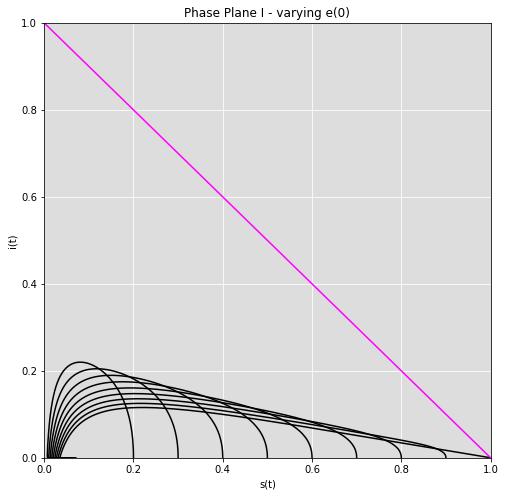

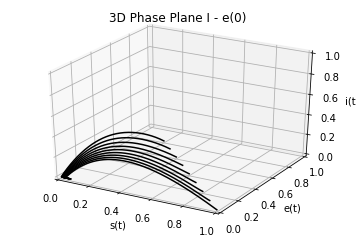

In [12]:
makePhase(1)

### Plane I
The above two graphics are two phase planes which vary $e(0)$ from 0.01 to 0.8 included every even tenth between.  The two-dimensional plot shows clearly how increased $e(0)$ values increase $i_{max}$. 

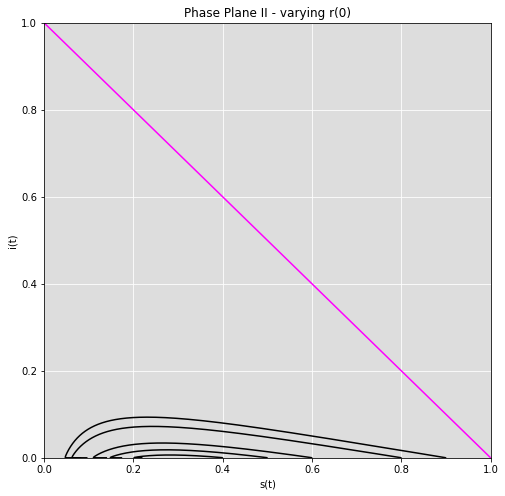

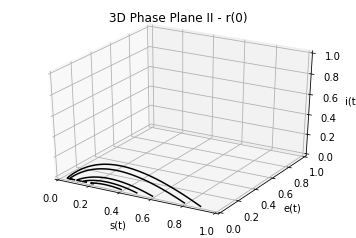

In [13]:
makePhase(2)

### Plane II

This second phase plane has five initial recovered values evenly spaced between 0.1 and 0.6. As the initial recovered value increases, the $i_{max}$ decreases and the remaining susceptible population after outbreak increases.

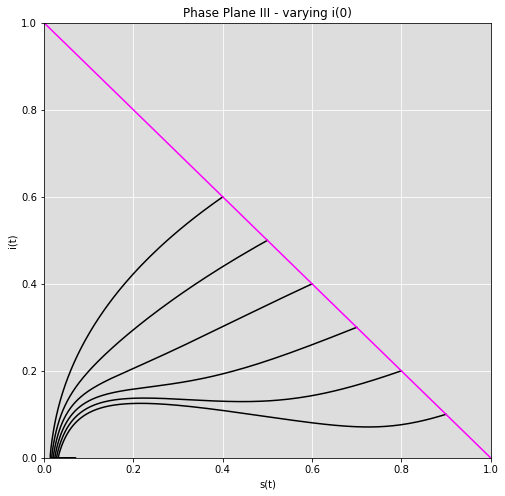

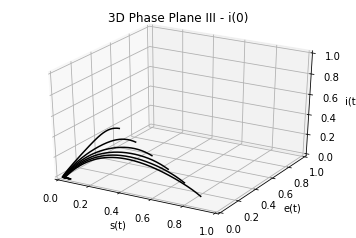

In [14]:
makePhase(3)

### Plane III
This last phase plane varies the initial values of $i$. $i(0)$ starts at 0.1 and includes all 0.1 increments up to and including 0.6. For the lowest two you can see the ratio of infected decreases before rebounding as individuals move from a latent state to infected before sharply decreasing again. All the rest decrease sharply before ending $r = 0$ and some small amount of susceptible population left. The ratio of susceptible persons remaining after the outbreak decreased with higher initial $i$ values. 

## 3 MSEIR Model with Immunization

### 3.1 The Model
![title](img/VACMOD.png)

The model for MSEIR with vaccinations varies from the original in that a rate of vaccination $\rho$ moves persons from susceptible to removed without them having to pass through infection.

### 3.2 ODEs with vaccination

Looking at the above diagram it is clear the equations obtained for $M'$,$E'$, and $I'$ are unchanged. Only $S'$ and $R'$ need to be rederived for this model including vaccinations.

\begin{align}\\
S_2' &= S' - \rho S\\
S_2' &= bS + \delta M - \beta S \frac{I}{N}-\rho S - dS\\
s_2' &= -m' -e' -i'-r_2'\\
\\R_2' &= R' +\rho S\\
R_2' &= \gamma I+ +\rho S - dR\\
r_2' &= \gamma i + \rho s - br 
\end{align}


### 3.3 Herd Immunity

Phase plane II already hinted at the mechanism behind herd immunity. As the ratio of persons immune to a disease increase in a population, the ability for that disease to infect new person is decreased. Herd immunity is obtained when the "Critical Vaccination Level" ,$V_C = (1-\frac{1}{R_0})$ is reached [Fine, 913]. A successful continuous immunization program must maintain the critical vaccination level to avoid a disease breaking out in the population.

\begin{align}\\
V_C &= \left(1-\frac{1}{R_0}\right)\\
 &= \left(1- \frac{1}{\frac{\beta \epsilon}{(\gamma + b)(\epsilon + b)}}\right)\\
 &=\left(1- \frac{1}{\frac{\frac{1}{2} \frac{1}{14}}{(\frac{1}{7} + \frac{1}{19000})(\frac{1}{14} + \frac{1}{19000})}}\right)\\
 &\approx 0.71
\end{align}

To maintain this level of immunity we could simply vaccinate 72% of the susceptible population every time unit and eradicate the disease. However, bounded by reality and cost, this number would be better used to determine what percentage of the susceptible population should be vaccinated to maintain the removed/recovered compartment at 72% of the total population. One way to guarantee this is to consider a simpler compartment model of just $s$ with all births, $\rho s$ connecting $s$ and $r$ compartments, and death affecting both $s$ and $r$. This is a safe simplification as it will increase the value of $\rho$ slightly and lead to an immunization level slightly above our needed threshold. 

\begin{align}\\
R_2' &= \rho S_2 - dR_2\\
r_2' &= \rho s_2 - dr_2 - qr_2\\
r_2' &= \rho s_2 - br_2\\
\end{align}


For a vaccination rate that would tend to and be stable at 72%. $r' = s' =0$, $1 = s+r$, and $r= 0.72$.

\begin{align}
0 &= \rho 0.28 - \frac{1}{19000}\times0.72\\
\rho &= \frac{25}{7}\times\frac{9}{237500}\\
\rho &= \frac{9}{66500} \approx 0.000135\\
\end{align}

This means, with no other forces acting on the population and a $\beta$ of $0.5$, around 5% of the susceptible population would need to be vaccinated annually to prevent a chicken pox epidemic from this community.

### ODE plot with vaccinations

Below is a plot using the same data as the second ODE plot ($\beta = 0.5$), with the exception that $\rho$ of $\frac{9}{66500}$ was introduced, as per the diagram above.

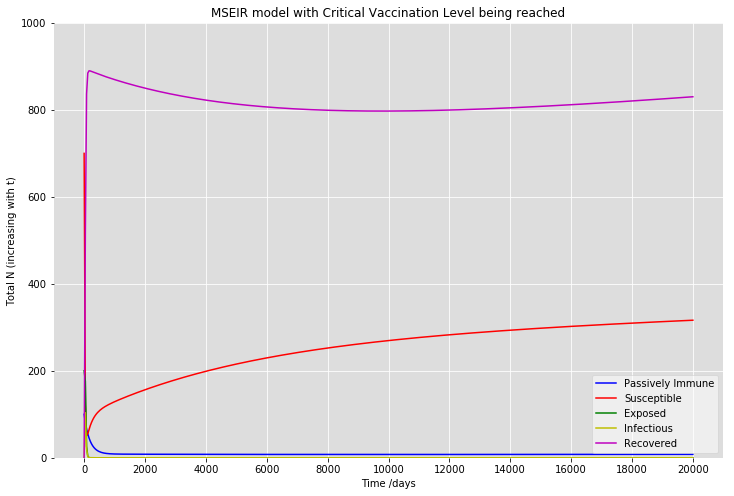

In [15]:
makePlot(3)

Clearly the initial outbreak of chicken pox was significant, as vaccination rates hadn't played a role yet. But clearly the recovered compartment did not drift down sufficiently to lead to another outbreak  as we saw in the earlier model without vaccination. This demonstrates that the $V_C$ enforced by the simplified model presented in 3.3 was sufficient.

## Conclusion

The MSEIR is a more robust and more widely applicable compared to other compartmental disease models such as the SIR. However, it still has easily understood assumptions, variables and results. It can be used to effectively model diseases that exist in a population for long amounts of time or in a population with extreme population dynamics, such as a high birth or death rate. For example animals that breed quickly, breed many, and die early. 
However, it is not always an applicable or useful model. It is easy to see how diseases whose effect on a population is not even across age or sex categories would not be well modeled or for a disease like Zika was modeled with these exact categories, these systems of equations would put a child born with microcephaly due to the virus would just be placed in the maternally immune category.

## References

Chauve,C. Personal email exchange (2017)


Fine,P. Eames, K. and Heymann, D. "Herd Immunity": A Rough Guide, Invited Article. Vol 52, No 7, 911-916 (2011)


Hethcote, H. The Mathematics of Infectious Diseases, SIAM Review, Vol 42, No 4, 599-653 (2000)



In [1]:
# ALL ODE functions and plots were directly adapted from class and lecture examples and do NOT represent original work

#This needs to be run before the plots can be generated
from IPython.display import Image # for the state diagram generated in ipe
from scipy.integrate import odeint #ODE solver function
import numpy as np                 #Number package
import matplotlib.pyplot as plt    #Plot package
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

In [2]:
#adapted from HW2 Solution
def diffs(y, t, delta, beta, epsilon, gamma, births, deaths):
    #The vector y holds all the initial values
    M, S, E, I, R, N = y
    
    q = births - deaths #define q
    
    #define the system of ODEs as per part I
    dM_dt = (births*(N-S)) -((delta + deaths) * M)
    dS_dt = (births * S) + (delta*M) - (beta*S*I/N) - (deaths*S)
    dE_dt = (beta * S * I/N)-((epsilon+deaths)*E)
    dI_dt = (epsilon * E)-((gamma + deaths) * I)
    dR_dt = (gamma * I) - (deaths * R)
    dN_dt = ((q) * N)
    
    #Return all th ODEs obtained
    return dM_dt, dS_dt, dE_dt, dI_dt, dR_dt, dN_dt

In [3]:
#Differential Equations for MSEIR model with vaccinations
def vacDiffs(y, t, delta, beta, epsilon, gamma, births, deaths, rho):
    #The vector y holds all the initial values
    M, S, E, I, R, N = y
    
    q = births- deaths #define q
    
     #define the system of ODEs as per part I
    dM_dt = (births*(N-S)) -((delta + deaths) * M)
    dS_dt = (births * S) + (delta*M) - (beta*S*I/N) - (deaths*S) - (rho *S)
    dE_dt = (beta * S * I/N)-((epsilon+deaths)*E)
    dI_dt = (epsilon * E)-((gamma + deaths) * I)
    dR_dt = (gamma * I) - (deaths * R) + (rho * S)
    dN_dt = ((q) * N)
    
    #Return all th ODEs obtained
    return dM_dt, dS_dt, dE_dt, dI_dt, dR_dt, dN_dt

In [4]:
#Adapted from HW2 Solution
def plot_ODE(M, S, E,I, R, N, maxt,t, ticlen, fs,title):
    ###This next block allows us to plot the results
    fig = plt.figure(facecolor='w', figsize= fs)
    ax = fig.add_subplot(111, facecolor='#dddddd')
    
    
    #This command sets the title of your graph
    ax.set_title(title)
    
    #Plots the five catagories with labeling and indivdual colours
    ax.plot(t, M, 'b',label='Passively Immune')
    ax.plot(t, S, 'r', label='Susceptible')
    ax.plot(t, E, 'g', label='Exposed')
    ax.plot(t, I, 'y', label='Infectious')
    ax.plot(t, R, 'm', label='Recovered')
    
    #Labels the x axis
    ax.set_xlabel('Time /days')
    #Defined the number of tic's on the x-axis
    plt.xticks(np.arange(0,maxt+1,ticlen))
    
    #Labels the y axis
    ax.set_ylabel('Total N (increasing with t)')
    #sets the range of the y values
    ax.set_ylim(-0.1,1000)

    #Toggles the grid lines
    ax.grid(color = 'w', linestyle = '-')

    #Toggles legend, again alpha represents the transparency
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)

    #Toggles a border with 'True' and 'False'
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
    #Prints the plot to your screen
    plt.show()

In [5]:
#outputs the plot for the ODEs
def makePlot(num):
    #N = Total population
    N_0 = 1000
    #delta is transfer out rate from maternal immunity into susceptibility
    delta = 1/180
    #beta is the average number of infections contacts made per time unit
    beta = 1/6
    #epsilon is the transfer out rate from exposed to infectious
    epsilon = 1/14
    # trasfer out rate from infectious to recovered
    gamma = 1/7
    #birthrate
    births = 1/19000
    #deathrate
    deaths = 1/22000
    # vaccination rate
    rho = 9/66500

    #initial population with maternal immunity
    M_0 = 100
    #initial exposed populatiopn
    E_0 = 200
    #Initial infected population
    I_0 = 0
    #Initial recovered population
    R_0 = 0

    #Initial susceptible population depends on the previous values
    S_0 = N_0-M_0-E_0-I_0-R_0
    
    #We let y_0 be the vector that holds the initial values
    y_0 = [M_0, S_0, E_0, I_0, R_0, N_0]

    #Defines the domain for t to be [0,160]
    #and using 100 points to plot the curve
    maxt = 300
    t = np.linspace(0, maxt, 5000)
    
    ticlen = 50
    title = 'MSEIR model for chicken pox'
    
    if num ==1: # change vars for second plot
       
        
        #adapted from class notebook
        #This command solves the ODE using the differentials we defined above from diffs, giving the initial vector y_0 and domain of t
        #The "args" command inputs the arguments of N, beta, and gamma to the ODE solver
        #We let the solution be equal to "ret"
        ret = odeint(diffs, y_0, t, args=(delta, beta, epsilon, gamma, births, deaths),mxstep=5000000)

        #ret is a 5 dimensional vector that holds the results of all variables M(t),S(t),E(t) I(t) and R(t)
        #The ".T" after "ret" is a numpy command which gives us the transpose of the original array
        M,S,E,I,R,N = ret.T
    
    
        #taken from class notebook
        #Here is the call to the plotting function with the inputs
        plot_ODE(M,S,E,I,R,N,maxt,t,ticlen,(12,8),title)
    elif num == 2:
        beta2 = 1/2
        maxt2 = 20000
        t2 = np.linspace(0, maxt2, 500)
        ticlen2 = maxt2/10
        title2 = 'MSEIR model for chicken pox adjusted beta value'
        ret2 = odeint(diffs, y_0, t2, args=(delta, beta2, epsilon, gamma, births, deaths),mxstep=5000000)

        M2,S2,E2,I2,R2,N2 = ret2.T
        plot_ODE(M2,S2,E2,I2,R2,N2,maxt2,t2,ticlen2,(12,8),title2)
        
    else:
        beta3 = 1/2
        maxt3 = 20000
        t3 = np.linspace(0, maxt3, 500)
        ticlen3 = maxt3/10
        title3 = 'MSEIR model with Critical Vaccination Level being reached'
        ret3 = odeint(vacDiffs, y_0, t3, args=(delta, beta3, epsilon, gamma, births, deaths, rho),mxstep=5000000)

        M3,S3,E3,I3,R3,N3 = ret3.T
        plot_ODE(M3,S3,E3,I3,R3,N3,maxt3,t3,ticlen3,(12,8),title3)

In [6]:
#gets the datapoints for the phase plane
def phase_plane(M_0, E_0, I_0, R_0, N_0):
    
     #delta is transfer out rate from maternal immunity into susceptibility
    delta = 1/180
    #beta is the average number of infections contacts made per time unit
    beta = 1/2
    #epsilon is the transfer out rate from exposed to infectious
    epsilon = 1/14
    # trasfer out rate from infectious to recovered
    gamma = 1/7
    #birthrate
    births = 1/19000
    #deathrate
    deaths = 1/22000
    
    maxt = 1000
    t = np.linspace(0, maxt, 5000)

    #This is a check that both of your inputs are the same length
    #If they are not (one has too many or too little data points) then it will return an error message
    if len(I_0) == len(R_0) and len(R_0) == len(E_0) and len(E_0) == len(M_0):
        start = 0
        end = len(I_0)
    else:
        return "Input error"
    
    #Initial susceptible population depends on the previous values
    S_0 = []
    for i in range(start,end):
        S_0.append(N_0[i] - I_0[i] - R_0[i]- E_0[i]-M_0[i])

    #We let y_0 be the vector that holds the initial values for S, I and R
    y_0 = []
    for i in range(start,end):
        y_0.append([M_0[i],S_0[i],E_0[i],I_0[i],R_0[i],N_0[i]])
    
    #This command solves the ODE using the differentials we defined above from diffs, giving the initial vector y_0 and domain of t
    #The "args" command inputs the arguments of N, beta, and gamma to the ODE solver
    #We let the solution be equal to "ret"
    reti = []
    for i in range(start,end):
        reti.append(odeint(diffs, y_0[i], t, args=(delta, beta, epsilon, gamma, births, deaths),mxstep=5000000))
    
    #ret is a 5 dimensional array that holds the results of all variables for the given values of t
    #The ".T" after "ret" is a numpy command which gives us the transpose of the original array
    #We initialize arrays which will soon hold the data points we plot for our phase plane
    Mi = [0] * end
    Si = [0] * end
    Ei = [0] * end
    Ii = [0] * end
    Ri = [0] * end
    Ni = [0] * end
    for i in range(start,end):
        Mi[i],Si[i],Ei[i],Ii[i],Ri[i],Ni[i] = reti[i].T
        
    #after the calculations we will return Si, Ei Ii, Ni and the start and end length for the number of points
    return Si, Ei, Ii,Ni,start, end

In [7]:
#This function plots all of the resulting phase lines that we found with the function "Phase_plane"
def phase_plot(Si, Ii, Ni, start, end, title):

    #These commands are for formatting the resulting plot
    #figsize = (n,m) tells is to print out a picture with those same dimensions
    fig2 = plt.figure(facecolor='w', figsize=(8,8))
    ax2 = fig2.add_subplot(111, facecolor='#dddddd')

    #using the "start" and "end" from earlier, we plot each pair of susceptibles and infected 
    for i in range(start, end):
        ax2.plot(Si[i]/Ni[i], Ii[i]/Ni[i], 'black') 

    #plotting the line from x=1,y=0 to x=0,y=1
    ax2.plot([0,1],[1,0],'magenta')

    #labelling the axis
    ax2.set_xlabel("s(t)")
    ax2.set_ylabel("i(t)")

    #setting the max and min values showin on the plots
    ax2.set_ylim(0,1)
    ax2.set_xlim(0,1)

    #Setting the title of the plot
    ax2.set_title(title)

    #More formatting for the plot
    ax2.grid(color='w', linestyle='-')

    #prints the plot to the screen
    plt.show()

In [8]:
# ref: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html and class notes

def phase_plot3D (Si,Ei, Ii, Ni, start, end, title):
    
    mpl.rcParams['legend.fontsize'] = 10

    fig = plt.figure()
    ax3 = fig.gca(projection='3d')

    #using the "start" and "end" from earlier, we plot each pair of susceptibles and infected 
    for i in range(start, end):
        ax3.plot(Si[i]/Ni[i], Ei[i]/Ni[i], Ii[i]/Ni[i], 'black') 

    #labelling the axis
    ax3.set_xlabel("s(t)")
    ax3.set_ylabel("e(t)")
    ax3.set_zlabel("i(t)")

    #setting the max and min values showin on the plots
    ax3.set_ylim(0,1)
    ax3.set_xlim(0,1)
    ax3.set_zlim(0,1)

    #Setting the title of the plot
    ax3.set_title(title)

    #prints the plot to the screen
    plt.show()


In [9]:
#calls the 2 and 3d phase plane functions and outputs accordingly
def makePhase(num):
    #set initial condidtions for various phase plots
    M = [0,0,0,0,0,0,0,0,0]
    E = [1,100,200,300,400,500,600,700,800]
    I = [0,0,0,0,0,0,0,0,0]
    R = [0,0,0,0,0,0,0,0,0]
    N = [1000,1000,1000,1000,1000,1000,1000,1000,1000]

    M2 = [0,0,0,0,0]
    E2 = [1,1,1,1,1]
    I2 = [0,0,0,0,0]
    R2 = [100,200,400,500,600]
    N2 = [1000,1000,1000,1000,1000]

    M3 = [0,0,0,0,0,0]
    E3 = [0,0,0,0,0,0]
    I3 = [100,200,300,400,500,600]
    R3 = [0,0,0,0,0,0]
    N3 = [1000,1000,1000,1000,1000,1000]
    
    #Here we are simply calling the function defined above with inputs defined above
    Si,Ei, Ii, Ni, start, end = phase_plane(M,E,I,R,N)
    Si2,Ei2, Ii2, Ni2, start2, end2 =phase_plane(M2,E2,I2,R2,N2)
    Si3,Ei3, Ii3, Ni3, start3, end3 =phase_plane(M3,E3,I3,R3,N3)
    
    #for the three different plots
    if num == 1:
        phase_plot(Si, Ii, Ni, start, end, "Phase Plane I - varying e(0)")
        phase_plot3D(Si,Ei, Ii, Ni, start, end, "3D Phase Plane I - e(0)")
    
    elif num == 2:
        phase_plot(Si2, Ii2, Ni2, start2, end2, "Phase Plane II - varying r(0)")
        phase_plot3D(Si2,Ei2, Ii2, Ni2, start2, end2, "3D Phase Plane II - r(0)")
        
    else:
        phase_plot(Si3, Ii3, Ni3, start3, end3, "Phase Plane III - varying i(0)")
        phase_plot3D(Si3, Ei3, Ii3, Ni3, start3, end3, "3D Phase Plane III - i(0)")
